In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
## igonring the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading the data
df = pd.read_csv("data/airline_passengers.csv",index_col='Month',parse_dates=True)

In [4]:
df.shape

(144, 1)

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


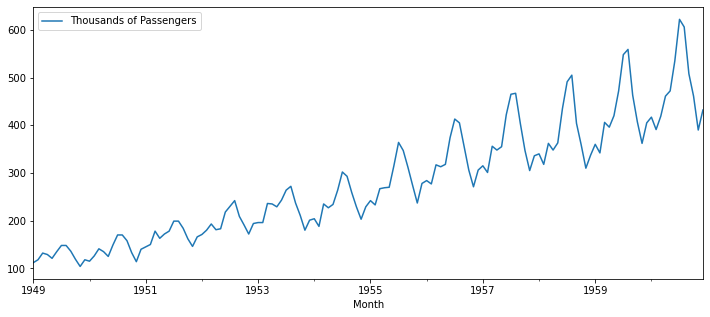

In [8]:
df.plot(figsize=(12,5));

In [9]:
## spliiting the dataframe into train and test
train = df.iloc[:108]
test = df.iloc[108:]

In [10]:
## fitting the model using triple EWMA i.e. holt-winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [11]:
## evaluating the model using the fitted model
test_predictions = fitted_model.forecast(36)

In [12]:
test_predictions.rename('test predictions',inplace=True)

1958-01-01    356.968595
1958-02-01    344.588791
1958-03-01    405.718334
1958-04-01    400.610841
1958-05-01    409.001673
1958-06-01    480.694167
1958-07-01    530.470025
1958-08-01    523.288484
1958-09-01    454.210536
1958-10-01    392.518080
1958-11-01    345.928356
1958-12-01    396.605092
1959-01-01    408.958806
1959-02-01    394.775963
1959-03-01    464.808636
1959-04-01    458.957269
1959-05-01    468.570172
1959-06-01    550.704223
1959-07-01    607.729620
1959-08-01    599.502133
1959-09-01    520.363420
1959-10-01    449.685849
1959-11-01    396.310627
1959-12-01    454.368108
1960-01-01    468.521062
1960-02-01    452.272578
1960-03-01    532.505066
1960-04-01    525.801484
1960-05-01    536.814446
1960-06-01    630.910800
1960-07-01    696.241584
1960-08-01    686.815816
1960-09-01    596.151052
1960-10-01    515.179740
1960-11-01    454.030756
1960-12-01    520.543941
Freq: MS, Name: test predictions, dtype: float64

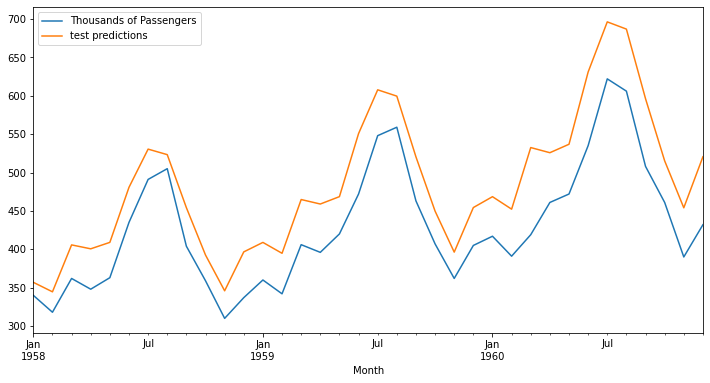

In [13]:
## plotting the test set with the test predictions
test['Thousands of Passengers'].plot(figsize=(12,6),legend=True)
test_predictions.plot(legend=True);

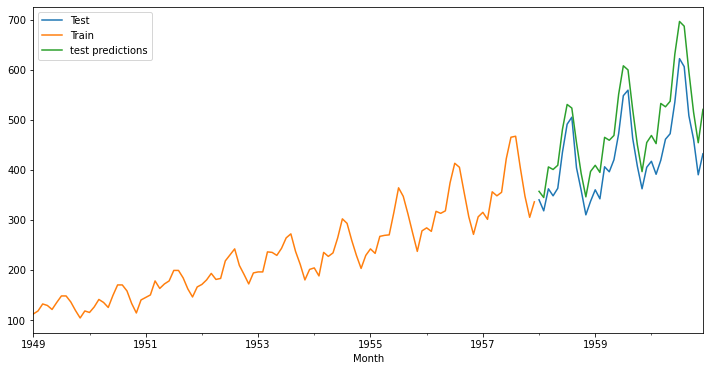

In [17]:
## plotting train, test and test predictions together
test['Thousands of Passengers'].plot(figsize=(12,6),label='Test',legend=True)
train['Thousands of Passengers'].plot(legend=True,label='Train')
test_predictions.plot(legend=True);

In [18]:
## evaluating the model using some quantitative measure
from sklearn.metrics import mean_squared_error

In [19]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],test_predictions))

In [20]:
## finding the average of the column
test['Thousands of Passengers'].mean()

428.5

In [21]:
rmse

59.37915109623655

**The error in forecasting is almost 10% of the average of the column.**

## forecasting into the future

In [22]:
## now fitting the data onto the whole dataframe
fitted_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

In [24]:
predictions = fitted_model.forecast(36)

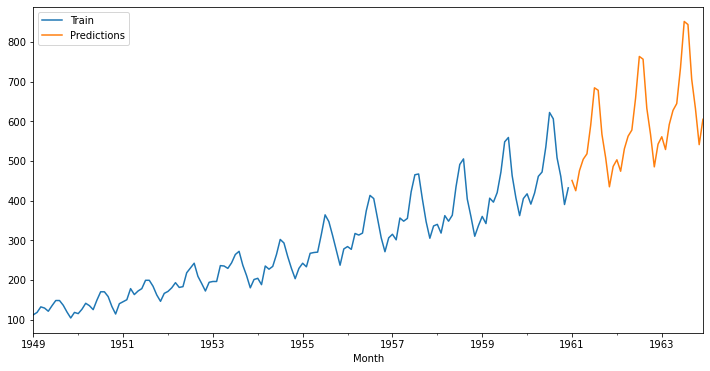

In [26]:
## plotting the results with the predictions
df['Thousands of Passengers'].plot(figsize=(12,6),label='Train',legend=True)
predictions.plot(label='Predictions',legend=True);

### First order differencing

In [29]:
df['Thousands of Passengers'].diff(1)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Freq: MS, Name: Thousands of Passengers, Length: 144, dtype: float64

### Second order differencing

In [30]:
df['Thousands of Passengers'].diff(2)

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Freq: MS, Name: Thousands of Passengers, Length: 144, dtype: float64